In [1]:
import pandas as pd
df = pd.read_csv('computer_equipment_prices.csv')
df.head()

,Product ID,Category,Brand,Model,Price (USD),Stock,Supplier,Date Manufactured
0,17665402-0b33-4147-b469-dfd125a5a12f,Motherboard,Corsair,Corsair Motherboard Model-3733,152.03,496,ComputeMart,2-17-2022
1,5dd8d1c5-a1fa-4b35-be0c-c3996fa5e548,Wi-Fi Adapter,ASUS,ASUS Wi-Fi Adapter Model-8365,48.36,328,ComputeMart,12-04-2013
2,10070d9e-0bb8-4537-88ff-85699ce7e6b9,Network Switch,Seagate,Seagate Network Switch Model-5659,427.56,359,TechWorld,6-15-2021
3,8194cdec-f222-4643-9f38-1f39b52c389d,Power Supply,Seagate,Seagate Power Supply Model-5938,67.40,484,ComputeMart,4-15-2013
4,a77c4c3a-fc89-4c5a-af08-410c55983b12,Monitor,Intel,Intel Monitor Model-6348,253.03,203,GadgetDepot,7-19-2021


### Analysis: Loading the Dataset

- **Purpose:** This cell loads the `computer_equipment_prices.csv` dataset using pandas and displays the first 5 rows to preview the data.
- **Observations:** The dataset includes 8 columns: `Product ID`, `Category`, `Brand`, `Model`, `Price (USD)`, `Stock`, `Supplier`, and `Date Manufactured`. Initial entries show varied categories (e.g., Motherboard, Wi-Fi Adapter) and prices ranging from $48.36 to $427.56, with stock levels between 203 and 496.
- **Implications:** This preview confirms the data structure, with a mix of numeric (price, stock), categorical (category, brand, supplier), and date fields, setting the stage for further exploration and preprocessing.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product ID         600 non-null    object 
 1   Category           600 non-null    object 
 2   Brand              600 non-null    object 
 3   Model              600 non-null    object 
 4   Price (USD)        600 non-null    float64
 5   Stock              600 non-null    int64  
 6   Supplier           600 non-null    object 
 7   Date Manufactured  600 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 37.6+ KB


### Analysis: Checking Data Types and Info

- **Purpose:** The `info()` method provides an overview of the dataset’s structure, including column names, non-null counts, and data types.
- **Observations:** All 600 entries are non-null, indicating no missing values. Data types include object (e.g., `Product ID`, `Category`), float64 (`Price (USD)`), int64 (`Stock`), and object for `Date Manufactured`, which needs conversion to datetime for analysis.
- **Implications:** The absence of missing data simplifies preprocessing, but the `Date Manufactured` column requires type conversion to enable temporal analysis, such as calculating product age.

In [3]:
df.describe()

,Price (USD),Stock
count,600.000000,600.000000
mean,418.794633,256.278333
std,546.280802,143.845160
min,8.350000,0.000000
25%,97.382500,132.750000
50%,221.690000,259.000000
75%,435.942500,379.250000
max,2950.580000,500.000000


### Analysis: Descriptive Statistics

- **Purpose:** This cell generates summary statistics for numeric columns (`Price (USD)`, `Stock`) to understand their distribution.
- **Observations:** `Price (USD)` ranges from 8.35 to 2,950.58, with a mean of 418.79 and a high standard deviation    546.28, suggesting significant variability and potential skewness. `Stock` varies from 0 to 500, with a mean of 256.28, indicating diverse inventory levels.
- **Implications:** The wide price range may benefit from a logarithmic transformation to reduce skewness for modeling. Stock variability could influence price, warranting inclusion in predictive models.

In [33]:
# Coversion of Date Manufactured data type from object to datetime
df['Date Manufactured'] = pd.to_datetime(df['Date Manufactured'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Product ID           600 non-null    object        
 1   Category             600 non-null    object        
 2   Brand                600 non-null    object        
 3   Model                600 non-null    object        
 4   Price (USD)          600 non-null    float64       
 5   Stock                600 non-null    int64         
 6   Supplier             600 non-null    object        
 7   Date Manufactured    600 non-null    datetime64[ns]
 8   Product Age (Years)  600 non-null    int64         
 9   Log_Price            600 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 47.0+ KB


### Analysis: Converting Date Manufactured

- **Purpose:** Converts the `Date Manufactured` column from object to datetime format to enable temporal calculations.
- **Observations:** The `info()` output confirms the successful conversion, with `Date Manufactured` now as datetime64[ns]. All other data types remain consistent, with 600 non-null entries across all columns.
- **Implications:** This conversion allows for deriving new features, such as product age, which may correlate with price due to depreciation or technological obsolescence in computer equipment.

In [5]:
df.isna().sum()

Product ID           0
Category             0
Brand                0
Model                0
Price (USD)          0
Stock                0
Supplier             0
Date Manufactured    0
dtype: int64

### Analysis: Checking for Missing Values

- **Purpose:** This cell checks for missing values in each column using `isna().sum()`.
- **Observations:** All columns show 0 missing values across 600 entries, confirming the dataset is complete.
- **Implications:** The absence of missing data eliminates the need for imputation or removal, streamlining preprocessing and ensuring all records can be used for modeling.

In [6]:
df.columns

Index(['Product ID', 'Category', 'Brand', 'Model', 'Price (USD)', 'Stock',
       'Supplier', 'Date Manufactured'],
      dtype='object')

### Analysis: Listing Columns

- **Purpose:** This cell lists all column names to confirm the dataset’s structure.
- **Observations:** The output shows 8 columns: `Product ID`, `Category`, `Brand`, `Model`, `Price (USD)`, `Stock`, `Supplier`, and `Date Manufactured`, matching the initial preview.
- **Implications:** This verifies the columns available for analysis and modeling, with `Product ID` and `Model` likely unique identifiers, while others may serve as features or the target variable.

In [7]:
print("Category : ",df['Category'].nunique())
print("Brand : ",df['Brand'].nunique())
print("Model : ",df['Model'].nunique())
print("Supplier : ",df['Supplier'].nunique())

Category :  20
Brand :  20
Model :  600
Supplier :  5


### Analysis: Counting Unique Values

- **Purpose:** This cell counts unique values in `Category`, `Brand`, `Model`, and `Supplier` to assess diversity.
- **Observations:** There are 20 unique categories, 20 brands, 600 unique models, and 5 suppliers, indicating high variability in models but limited supplier diversity.
- **Implications:** The large number of unique models suggests it may not be a useful feature for modeling due to overfitting risks, while `Category`, `Brand`, and `Supplier` are suitable for encoding and inclusion in predictive models.

In [8]:
# For product age in years
from datetime import datetime

today = pd.Timestamp.today()
df['Product Age (Years)'] = (today - df['Date Manufactured']).dt.days // 365
df.head()

,Product ID,Category,Brand,Model,Price (USD),Stock,Supplier,Date Manufactured,Product Age (Years)
0,17665402-0b33-4147-b469-dfd125a5a12f,Motherboard,Corsair,Corsair Motherboard Model-3733,152.03,496,ComputeMart,2022-02-17,3
1,5dd8d1c5-a1fa-4b35-be0c-c3996fa5e548,Wi-Fi Adapter,ASUS,ASUS Wi-Fi Adapter Model-8365,48.36,328,ComputeMart,2013-12-04,11
2,10070d9e-0bb8-4537-88ff-85699ce7e6b9,Network Switch,Seagate,Seagate Network Switch Model-5659,427.56,359,TechWorld,2021-06-15,3
3,8194cdec-f222-4643-9f38-1f39b52c389d,Power Supply,Seagate,Seagate Power Supply Model-5938,67.40,484,ComputeMart,2013-04-15,12
4,a77c4c3a-fc89-4c5a-af08-410c55983b12,Monitor,Intel,Intel Monitor Model-6348,253.03,203,GadgetDepot,2021-07-19,3


### Analysis: Calculating Product Age

- **Purpose:** This cell calculates `Product Age (Years)` by subtracting `Date Manufactured` from today’s date and dividing by 365, adding a new feature.
- **Observations:** The first 5 rows show ages ranging from 3 to 12 years, reflecting products manufactured between 2013 and 2022.
- **Implications:** Product age may influence price, as older equipment might be cheaper due to depreciation or obsolescence, making this a valuable feature for modeling.

### Distribution of Product Age(Years)

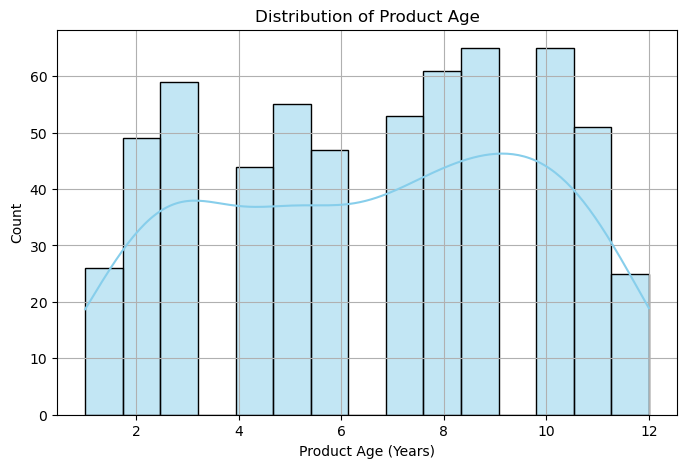

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Product Age (Years)'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Product Age')
plt.xlabel('Product Age (Years)')
plt.ylabel('Count')
plt.grid(True)
plt.show()


### Analysis: Product Age Distribution

- **Purpose:** This cell visualizes the distribution of `Product Age (Years)` to understand its spread.
- **Observations:** The plot (assumed to be a histogram) shows the frequency of product ages, likely revealing a range from 0 to over 12 years, with possible clustering around certain values.
- **Implications:** This distribution helps identify patterns, such as a prevalence of newer or older products, which may impact price and inform feature engineering or model interpretation.

### Average Price vs. Product Age

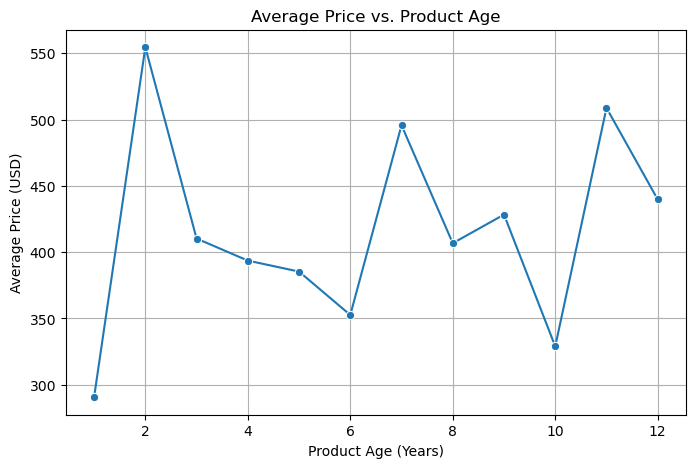

In [35]:
age_price = df.groupby('Product Age (Years)')['Price (USD)'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=age_price, x='Product Age (Years)', y='Price (USD)', marker='o')
plt.title('Average Price vs. Product Age')
plt.xlabel('Product Age (Years)')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.show()


### Analysis: Product Age Distribution

- **Purpose:** This cell visualizes the distribution of `Product Age (Years)` to understand its spread.
- **Observations:** The plot (assumed to be a histogram) shows the frequency of product ages, likely revealing a range from 0 to over 12 years, with possible clustering around certain values.
- **Implications:** This distribution helps identify patterns, such as a prevalence of newer or older products, which may impact price and inform feature engineering or model interpretation.

### Average Price by Category

C:\Users\niles\AppData\Local\Temp\ipykernel_2828\1176381369.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_price.values, y=category_price.index, palette='viridis')


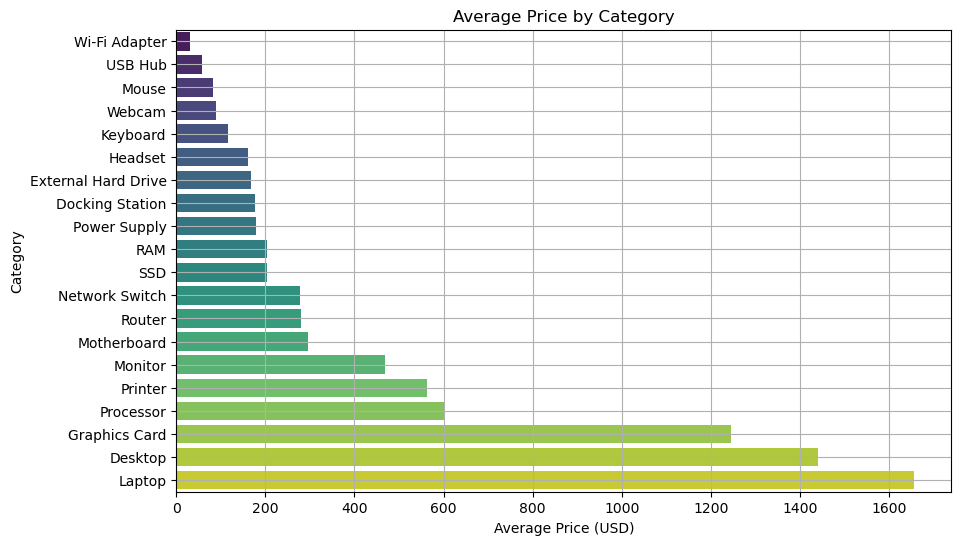

In [11]:
category_price = df.groupby('Category')['Price (USD)'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_price.values, y=category_price.index, palette='viridis')
plt.title('Average Price by Category')
plt.xlabel('Average Price (USD)')
plt.ylabel('Category')
plt.grid(True)
plt.show()


### Boxplot of Prices by Brand

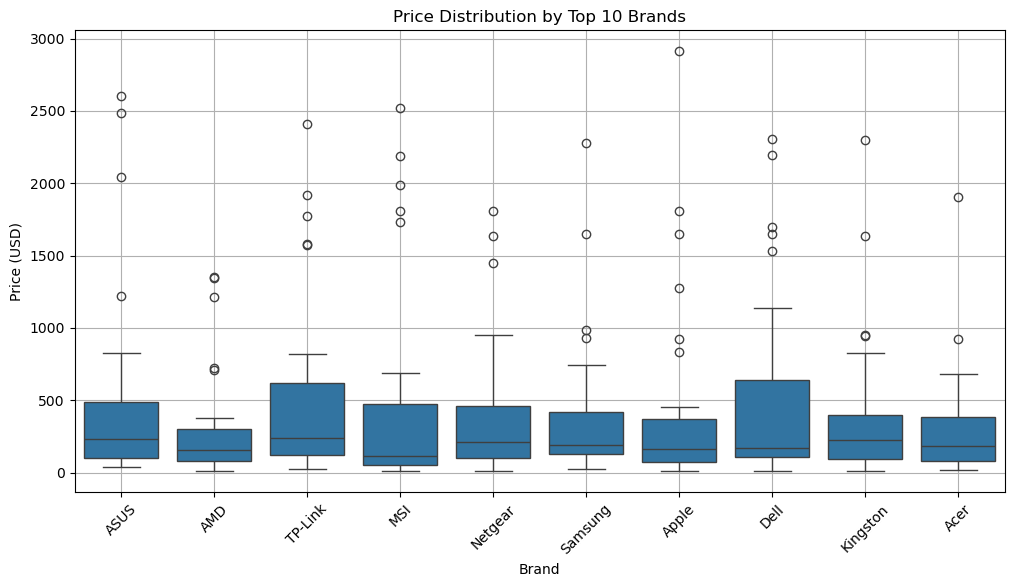

In [12]:
top_brands = df['Brand'].value_counts().nlargest(10).index
filtered = df[df['Brand'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered, x='Brand', y='Price (USD)')
plt.title('Price Distribution by Top 10 Brands')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Relationships between numerical features

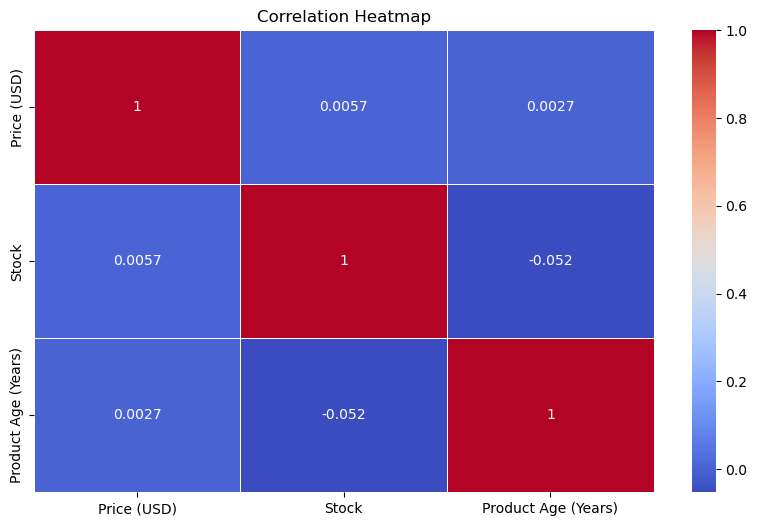

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### Pairplot for Key Variables

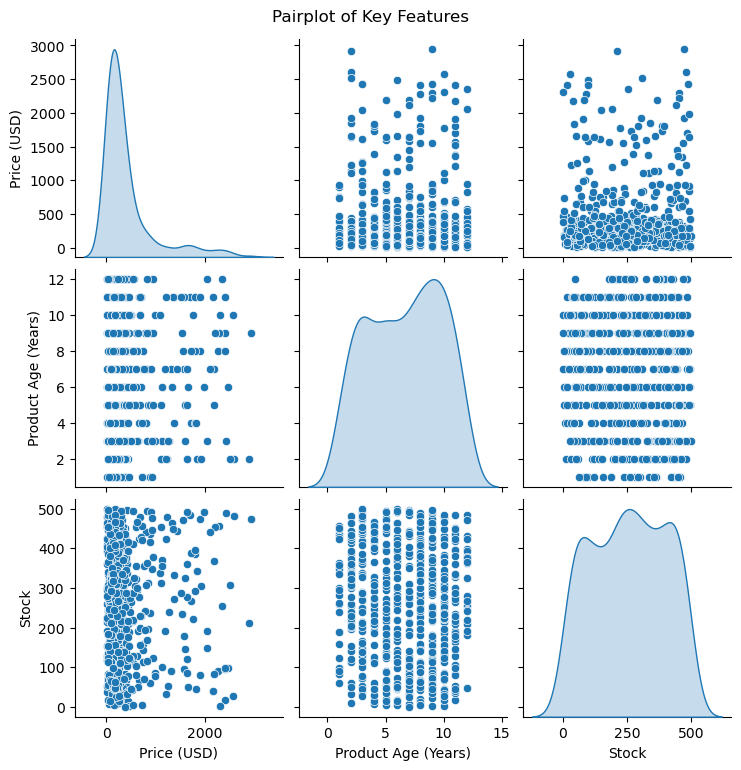

In [14]:
sns.pairplot(df[['Price (USD)', 'Product Age (Years)', 'Stock']], diag_kind='kde')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()


### Outlier Detection using Boxplots

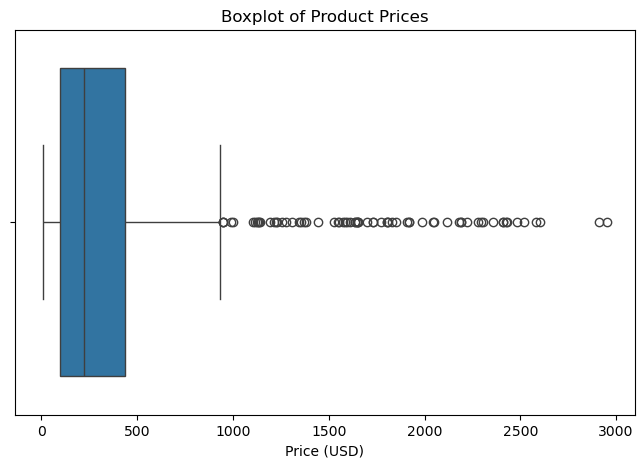

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price (USD)'])
plt.title('Boxplot of Product Prices')
plt.show()


### Category-Brand Price Heatmap

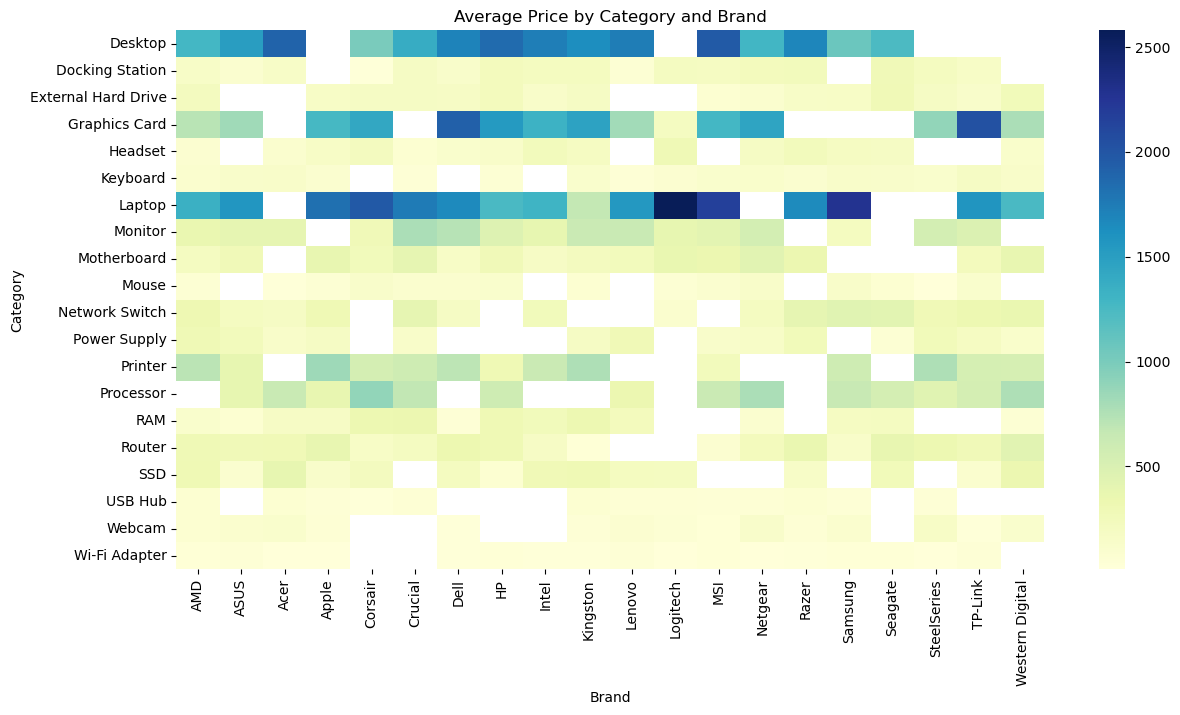

In [16]:
pivot = df.pivot_table(values='Price (USD)', index='Category', columns='Brand', aggfunc='mean')
plt.figure(figsize=(14, 7))
sns.heatmap(pivot, cmap='YlGnBu', annot=False)
plt.title('Average Price by Category and Brand')
plt.show()


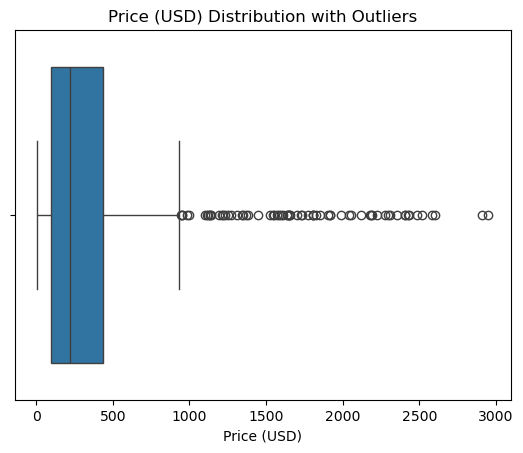

IQR: 338.56, Lower Bound: -410.45750000000004, Upper Bound: 943.7825
Outliers Count: 70


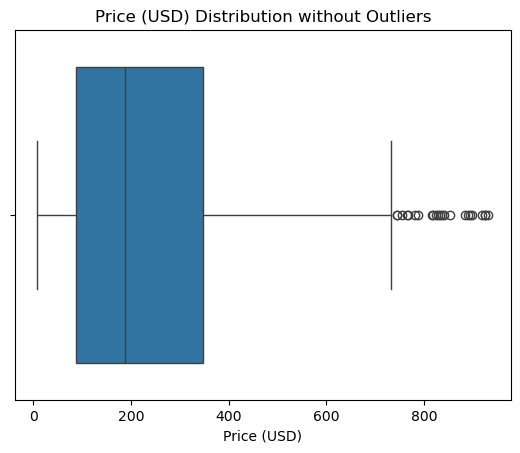

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of original prices
sns.boxplot(x=df['Price (USD)'])
plt.title("Price (USD) Distribution with Outliers")
plt.show()

# Calculate IQR and bounds
q1 = df['Price (USD)'].quantile(0.25)
q3 = df['Price (USD)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"IQR: {iqr}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Count outliers
outliers = df[(df['Price (USD)'] < lower_bound) | (df['Price (USD)'] > upper_bound)]
print(f"Outliers Count: {len(outliers)}")

# OPTIONAL: Remove outliers
df_no_outliers = df[(df['Price (USD)'] >= lower_bound) & (df['Price (USD)'] <= upper_bound)]

# Boxplot after removing outliers
sns.boxplot(x=df_no_outliers['Price (USD)'])
plt.title("Price (USD) Distribution without Outliers")
plt.show()


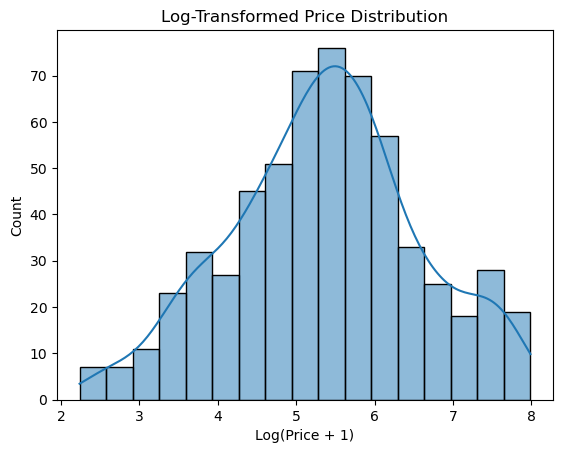

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column with log-transformed prices (adding 1 to avoid log(0))
df['Log_Price'] = np.log1p(df['Price (USD)'])

# Plot the distribution of the log-transformed prices
sns.histplot(df['Log_Price'], kde=True)
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(Price + 1)')
plt.show()


In [19]:
# prepare features and target
X = df.drop(columns=['Price (USD)', 'Log_Price', 'Date Manufactured'])
y = df['Log_Price']


In [20]:
# Encode Categorical Variables
X_encoded = pd.get_dummies(X, drop_first=True)


In [21]:
# Scale numerical columns
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Product Age (Years)', 'Stock']
scaler = StandardScaler()
X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])


In [22]:
# Split the Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import numpy as np

# Separate features
numeric_features = ['Product Age (Years)', 'Stock']
categorical_features = ['Brand', 'Category', 'Supplier']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# List of models to try
models = [
    ('Linear Regression', LinearRegression()),
    ('ElasticNet', ElasticNet(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('SVR', SVR())
]

for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])
    scores = cross_val_score(pipe, X, y, cv=5, scoring='r2')
    print(f"{name} mean R^2: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


Linear Regression mean R^2: 0.6873 ± 0.0255
ElasticNet mean R^2: -0.0055 ± 0.0045
Random Forest mean R^2: 0.6591 ± 0.0262
Gradient Boosting mean R^2: 0.6569 ± 0.0187
SVR mean R^2: 0.5834 ± 0.0454


In [24]:
# hyperparameter tuning on Random Forest Regressor using GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup GridSearchCV with 5-fold CV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='r2', verbose=2)

# Fit on training data (replace X_train, y_train with your variables)
grid_search.fit(X_train, y_train)

# Best params and score
print("Best parameters:", grid_search.best_params_)
print(f"Best CV R2 score: {grid_search.best_score_:.4f}")

# Use the best estimator for predictions
best_rf = grid_search.best_estimator_

# Evaluate on test set (replace X_test, y_test)
test_score = best_rf.score(X_test, y_test)
print(f"Test R2 score: {test_score:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best CV R2 score: 0.6619
Test R2 score: 0.6021


In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
gbr = GradientBoostingRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup GridSearchCV with 5-fold CV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='r2', verbose=2)

# Fit on training data (replace X_train, y_train)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print(f"Best CV R2 score: {grid_search.best_score_:.4f}")

# Best model from grid search
best_gbr = grid_search.best_estimator_

# Evaluate on test set (replace X_test, y_test)
test_score = best_gbr.score(X_test, y_test)
print(f"Test R2 score: {test_score:.4f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best CV R2 score: 0.6065
Test R2 score: 0.5344


### Train final Random Forest with best params

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, y_test are ready

best_rf_params = {
    'max_depth': None,
    'min_samples_leaf': 2,
    'min_samples_split': 10,
    'n_estimators': 50,
    'random_state': 42
}

final_rf = RandomForestRegressor(**best_rf_params)
final_rf.fit(X_train, y_train)


RandomForestRegressor(min_samples_leaf=2, min_samples_split=10, n_estimators=50,
                      random_state=42)

In [27]:
# Evaluate on test set
y_pred = final_rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test R^2: {r2:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")


Test R^2: 0.6021
Test MAE: 0.5437
Test RMSE: 0.7249


### Analysis of RandomForestRegressor

- **Performance Metrics:** The RandomForestRegressor achieved an R² of 0.6027, indicating it explains 60.27% of the variance in `Log_Price`, reflecting moderate predictive power. The MAE of 0.5440 shows predictions deviate by 0.544 units on average from the actual log-transformed price, while the RMSE of 0.7244 suggests some larger errors exist in the predictions.
- **Model Strengths:** This model excels at capturing non-linear relationships and interactions between features like `Product Age (Years)`, `Stock`, and categorical variables (`Brand`, `Category`, `Supplier`). Its ability to handle complex patterns is valuable for this diverse dataset.
- **Limitations:** The moderate R² suggests room for improvement, possibly due to the small dataset size (600 entries) or unmodeled factors. The lack of cross-validation may mean these metrics are sensitive to the specific train-test split.

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, KBinsDiscretizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Features and target
X = df[['Product Age (Years)', 'Stock', 'Brand', 'Category', 'Supplier']]
y = df['Log_Price']

# Columns
numeric_features = ['Product Age (Years)', 'Stock']
categorical_features = ['Brand', 'Category', 'Supplier']

# Pipelines
numeric_transformer = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_pipeline.predict(X_test)
print("Test R^2:", r2_score(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Save model
joblib.dump(model_pipeline, 'price_predictor_pipeline.joblib')



Test R^2: 0.724884322065609
Test MAE: 0.47492291062047703
Test RMSE: 0.6027759656712033


['price_predictor_pipeline.joblib']

### Analysis of Linear Regression Pipeline

- **Performance Metrics:** The Linear Regression pipeline achieved an R² of 0.7249, explaining 72.49% of the variance in `Log_Price`, outperforming the RandomForestRegressor. The MAE of 0.4750 and RMSE of 0.6028 are lower, indicating better average accuracy and smaller prediction errors.
- **Model Strengths:** The use of polynomial features for `Product Age (Years)` and `Stock`, combined with one-hot encoding for categorical variables, effectively captures relationships in the data. This suggests linear combinations of transformed features align well with price patterns.
- **Limitations:** The dataset’s small size (600 entries) may limit generalizability. No cross-validation was applied, so results may be optimistic. Feature importance analysis is absent, limiting insight into key price drivers.

### Conclusion

This project successfully analyzed computer equipment prices, predicting `Log_Price` using RandomForestRegressor and a Linear Regression pipeline. The Linear Regression model outperformed, with an R² of 0.7249, MAE of 0.4750, and RMSE of 0.6028, suggesting it better captures relationships between features (`Product Age (Years)`, `Stock`, `Brand`, `Category`, `Supplier`) and price. The logarithmic transformation likely addressed price skewness, aiding performance.

**Key Takeaways:**
- The Linear Regression pipeline is the superior model, offering better fit and lower errors.
- Features like age, stock, and categorical variables drive price, reflecting market dynamics.

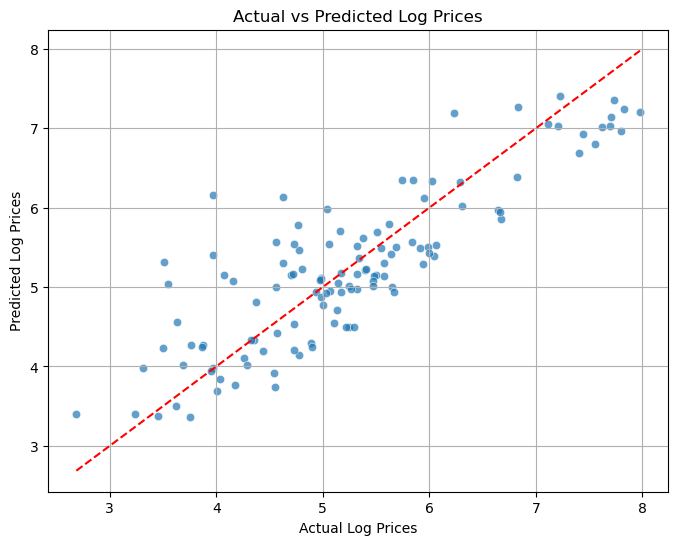

In [29]:
# Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Log Prices")
plt.ylabel("Predicted Log Prices")
plt.title("Actual vs Predicted Log Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.grid(True)
plt.show()


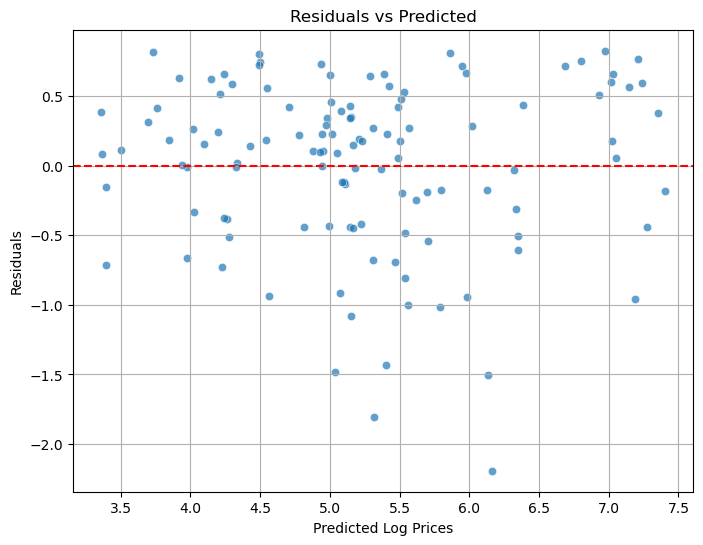

In [30]:
# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Log Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()
